Listing /home/doris/anaconda/pro/PyLysis ...
Compiling /home/doris/anaconda/pro/PyLysis/haloAnalysis.py ...
Compiling /home/doris/anaconda/pro/PyLysis/halo_analysis_lib.py ...
Compiling /home/doris/anaconda/pro/PyLysis/halo_analysis_load_cats.py ...
M_0: 13803842646028.867 a_0: 0.9900990099009901 alpha: 0.5
M_0: 13803842646028.867 a_0: 0.9900990099009901 alpha: 0.65
M_0: 13803842646028.867 a_0: 0.9900990099009901 alpha: 0.75
M_0: 13803842646028.867 a_0: 0.9900990099009901 alpha: 1.0


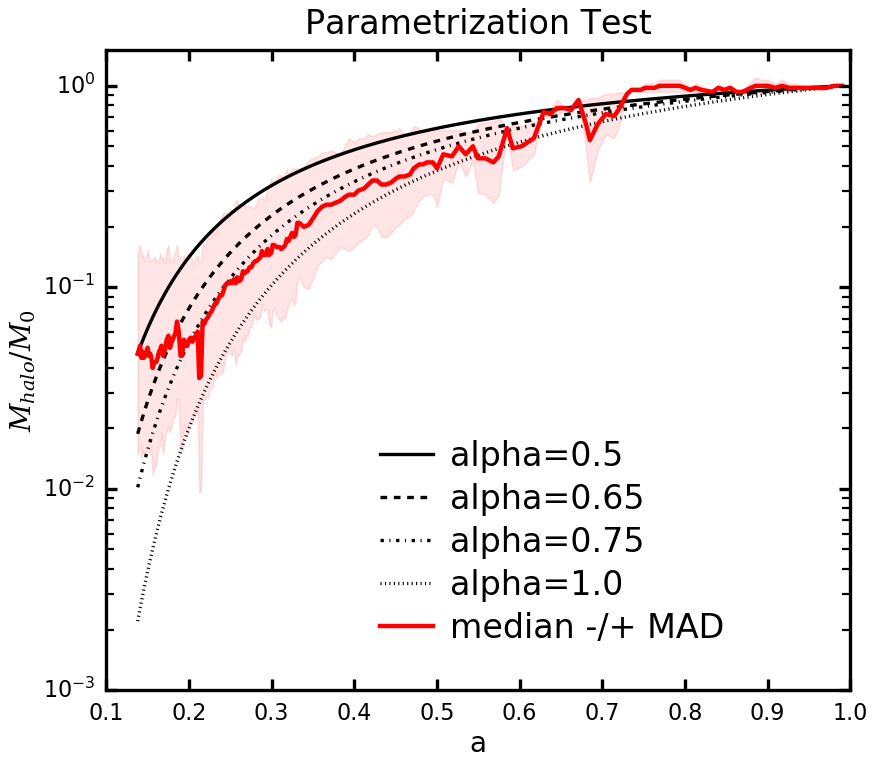

In [20]:
#load system relevant packages
from __future__ import print_function
import os, sys, compileall
import numpy as np
system_info = os.getcwd()
start = system_info.find('anaconda')
if start==-1:
    mycomp='/home/doris/'
else:
    mycomp = system_info[:start]
    
compileall.compile_dir(mycomp+'anaconda/pro/PyLysis', force=1)
sys.path.insert(0, mycomp+'/anaconda/pro/PyLysis/')

#load own packages
import haloAnalysis as hA
import halo_analysis_lib as ha_lib
import halo_analysis_load_cats as ha_lc
#initalize class: HaloAnalysis and call MAIN to load data!
myHaloData2 = hA.HaloAnalysis()

#Load plot related packages
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import NullFormatter
nullfmt = NullFormatter()
mpl.style.use('classic')            
mpl.mathtext.use_cm = False
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.tt'] = 'Typewriter'
mpl.mathtext.fallback_to_cm = True

#Load data from 'haloAnalysis.py'!
#The package 'PyLysis' where the class is included can be downloaded here: https://github.com/dstoppacher/PyLysis
data = myHaloData2.MAIN('load_ascii_file')

def mass_para(M_0, a, alpha=1.33):
    #mass accrection history parameterization from Wechsler+02 Eq.4 and Eq.5
    S     = 2.0
    a_0   = a[a.size-1]
    a_c   = a_0 * alpha/S
    print('M_0:', M_0, 'a_0:', a_0, 'alpha:', alpha)

    return M_0*np.exp(-a_c*S*(a_0/a-1))/M_0


#initialize figure and axes 
#----------------------
fig, ax = plt.subplots(figsize=(12,10), facecolor='w')
for axis in ['top','bottom','left','right']: ax.spines[axis].set_linewidth(3)   
ax.tick_params(axis='both', 
               which='major', 
               top='on', 
               bottom='on',
               left='on',
               right='on',
               pad=10, 
               labelsize=20,
               length=10,
               width=3,
               direction='in',
               zorder=20)
ax.tick_params(axis='both', 
               which='minor', 
               top='on', 
               bottom='on',
               left='on',
               right='on',
               pad=10, 
               labelsize=20,
               length=7.5,
               width=2,
               direction='in',
               zorder=20)

#a=np.arange(0.1,1,0.01)            #data_x for Fig.1
a=1.0/(data[str(0)]['z'] + 1.0)     #data_x for Fig.3

#Style options 'colors', 'linestyles', 'marker'
#=----------------------
#mycols=['#225588', '#ffab00', '#CC6677', '#AA4499','#117733']
mycols=['#332288', '#88CCEE', '#117733', '#DDCC77', '#CC6677']
#myls=[':','-.','--','-','-']
myls=['-','--','-.',':',':']
mymarker= ['o','.','s','^','*']
mymarkerfcols=['#332288', '#88CCEE', '#117733', '#DDCC77', '#CC6677']

#Specify label in the plot legend
#----------------------
mylabels = ['median', '-dy', '+dy']

for i, myalpha in enumerate([0.5,0.65,0.75,1.0]):
    data_para = mass_para(10**data[str(0)]['mhalo1_log50'][data[str(0)].size-1], a, alpha=myalpha)
    ax.plot(a, 
            data_para, 
            label='alpha='+str(myalpha),
            color='k',
            lw=3,
            ls=myls[i],
            markersize=5,
            markeredgewidth=2,
            markerfacecolor='k',
            alpha=1.0)

#define data_y and errors for Fig.3
#----------------------
data_y = 10**data[str(0)]['mhalo1_log50']/10**data[str(0)]['mhalo1_log50'][data[str(0)].size-1]
yerr_data1 = 10**(data[str(0)]['mhalo1_log50']-data[str(0)]['mhalo1_log10'])
yerr_data1 = yerr_data1/yerr_data1[data[str(0)].size-1]
yerr_data2 = 10**(data[str(0)]['mhalo1_log50']+data[str(0)]['mhalo1_log10'])
yerr_data2 = yerr_data2/yerr_data2[data[str(0)].size-1]

err_fill_between = True
#for i, mylabel in enumerate(['CT-ID79509', 'RS-ID3', 'RS-ID7', 'RS-ID54', 'RS-ID231']):
for i, mylabel in enumerate(['median -/+ MAD']):
    #print('mylabel:', mylabel, 'i', i)

    #define x-axis data, if not done before
    #----------------------
    #data_x = 1.0/(data[str(i)]['z1'] + 1.0) #data_x for Fig.3
    data_x = 1.0/(data[str(0)]['z'] + 1.0) #data_x for Fig.3
    
    #define y-axis data, if not done before
    #----------------------
    #data_y = data[str(i)]['mhalo1']/data[str(i)]['mhalo1'][data[str(i)].size-1] #data_y Fig.1 & 2

    #define styles for each loop
    #----------------------    
    #col=mycols[i]
    col    = 'r'
    ls     = myls[i]
    marker = mymarker[i]
    #label  = mylabels[i]
    fcol   = mymarkerfcols[i]
    
    if i!=0:
        key_sub1 = ax.twinx()
        key_sub2 = 'axis' + str(i)
        key_sub1.set_zorder(25)             
        plt.setp(key_sub1.get_yticklabels(), visible=False)
                
    ax.plot(data_x, 
            data_y, 
            label=mylabel,
            color=col,           
            lw=4,
            ls=ls,
            #marker=marker,
            markersize=5,
            markeredgewidth=2,
            markerfacecolor=fcol,
            alpha=1.0)

    #if true uncertainties are plotted as shaded region
    if err_fill_between==True:
        ax.fill_between(data_x, 
                        yerr_data2, 
                        yerr_data1, 
                        color=col, 
                        facecolor=col, 
                        alpha=0.1,
                        interpolate=False,
                        lw=1.5,
                        linestyle='-') 
    

#Format labels, axes styles, and legend
#----------------------
ax.set_xlabel('a', color='k', fontsize=25) 
ax.set_ylabel('$M_{halo}/M_0$', color='k', fontsize=25)
ax.set_title("Parametrization Test", color='k', fontsize=30, pad=15)

ax.legend(loc=(0.35,0.05),
           ncol=1,
           fontsize=30,
           shadow=False, 
           fancybox=False,
           borderaxespad=1,
           facecolor='w',
           numpoints=1, 
           frameon=False,
           labelspacing=0.3,
           handlelength=1.6,
           columnspacing=0.95,
           handletextpad=0.5)

ax.set_yscale('log')
ax.set_ylim(1e-3,1.5)

#Print into file
#----------------------
pp = PdfPages('/data/test2.pdf')
plt.savefig(pp, format='pdf', rasterized=True, pad_inches=0.05, bbox_inches=None, transparent=True)
pp.close()

#Print figure on screen
plt.show()